# Euler's method for a system of equations

This notebook implements Euler's method (a.k.a forward Euler) for the integration of a system of first order differential equations. 

This workbook solves the equation
$$
\frac{dx}{dt}=\vec{F}(\vec{x},t),\ \vec{x}(0)=\vec{x0}
$$

The fist step is to define a function which calculates the RHS of the ODE.

This time we're going to split up x into its components to make <code>f(t,x)</code> a bit more readable.

In [1]:
import numpy as np
import math

def f(t,x):
    X, Y = x # split the array
    return [X-Y*Y+X*t, X*X+X*Y-t]


Now we implement a generalised forward euler solver, there is a little Python magic with the 

<code>fun_ = lambda t,x: np.asarray(fun(t,x))</code>

statement, this ensures we know the <code>fun(t,x)</code> returns a vector.

In [2]:
def FwdEuler(t_stop,dt,x0,fun):
    """ General Forward Euler integrator, storing the time step and
    the results arrays, t and x.  The integtor will call the function,
    fun, and run at a time step of delta_t until t=t_stop.
    """

    # ensure fun returns an array
    fun_ = lambda t,x: np.asarray(fun(t,x))

    # how many points
    N_t = int((float(t_stop)//dt))
    N_eq = x0.shape[0]
    # initialise storage for array for the results
    x=np.zeros((N_t,N_eq))
    t=np.linspace(0.0,t_stop,N_t)

    x[0]=x0 # initial conditions

    # iterations count
    for i in range(N_t-1):
        x[i+1]=x[i]+dt*fun_(t[i],x[i]) #forward Euler
    return t,x



Now we are going to solve the equation for the first 1.5 seconds, with $\Delta t=0.01$.  We are passing the function <code>f</code> as an argument.

In [3]:
#Set the initial conditions
x0=np.array([0.5,1.2])

#Call the integrator
t,x=FwdEuler(1.5,0.01,x0,f)


Now we are going to plot the result

Text(0.5, 0, 't')

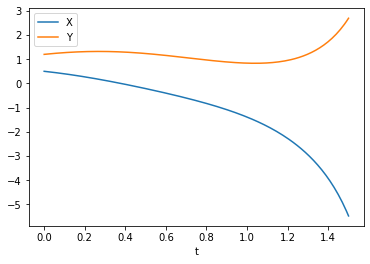

In [4]:
import matplotlib.pyplot as plt

# plot one line for each variable
for n in range(x0.shape[0]):
    plt.plot(t, x[:,n])
    
plt.legend(('X','Y'), loc='upper left')
plt.xlabel('t')
